In [2]:
from constants import *
from model_manager import section1, section2, single_model

Num GPUs Available:  1


In [3]:
import numpy as np
import tensorflow as tf

def get_metrics(model):
    y_pred = model.model.evaluate(model.val_dataset)


    y_labels = []
    for batch in model.val_dataset.take(-1):
        _, coords_batch = batch
        coords_batch = coords_batch.numpy()
        y_labels.append(coords_batch)

    y_labels = np.array(y_labels)
    y_true = y_labels.reshape(-1, y_labels.shape[2])

    # Calculate additional metrics
    # Mean Absolute Error (MAE)
    mae_metric = tf.keras.losses.MeanAbsoluteError()
    mae_value = mae_metric(y_true, y_pred).numpy()
    print("Mean Absolute Error (MAE):", mae_value)

    # Categorical Crossentropy
    crossentropy_metric = tf.keras.losses.CategoricalCrossentropy()
    crossentropy_value = crossentropy_metric(y_true, y_pred).numpy()
    print("Categorical Crossentropy:", crossentropy_value)

    # Accuracy (for classification problems)
    # Convert predictions and true labels to class indices
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_true_classes == y_pred_classes)
    print("Accuracy:", 1-accuracy)
    return mae_value, crossentropy_value, 1-accuracy

model compiled with params: {'num_conv_layers': 5, 'num_dense_layers': 4, 'conv_0_size': 178, 'conv_1_size': 30, 'conv_2_size': 54, 'conv_3_size': 84, 'conv_4_size': 80, 'dense_0_size': 112, 'dense_1_size': 97, 'dense_2_size': 7, 'dense_3_size': 110, 'flatten_type': 'global_average', 'activation': 'relu', 'optimizer': 'adam', 'conv_layers': [32, 64], 'dense_layers': [128, 64], 'learning_rate': 0.001, 'dropout': 0.01}


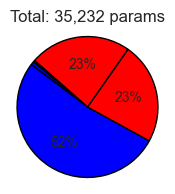

ValueError: Layer count mismatch when loading weights from file. Model expected 5 layers, found 10 saved layers.

In [4]:
model = section1()
params={
            "num_conv_layers": 5,
            "num_dense_layers": 4,
            "conv_0_size": 178,
            "conv_1_size": 30,
            "conv_2_size": 54,
            "conv_3_size": 84,
            "conv_4_size": 80,
            "dense_0_size": 112,
            "dense_1_size": 97,
            "dense_2_size": 7,
            "dense_3_size": 110,
            "flatten_type": "global_average",
            "activation": "relu",
            "optimizer": "adam"
        }
model.initialise_data_and_model(train_params=params, weights=SECT1_CHECKPOINT_FOLDER + f'regression_model_optimize_{3}.weights.h5')
params2 = {
    "stop_at": 5,
    "show_progress": True 
}
#model.train(params=params2)
#model.plot()
get_metrics(model)

In [ ]:
model = section2()
params={
            "num_conv_layers": 3,
            "num_dense_layers": 1,
            "conv_0_size": 4,
            "conv_1_size": 9,
            "conv_2_size": 74,
            "dense_0_size": 68,
            "flatten_type": "global_average",
            "activation": "relu",
            "optimizer": "adam"
        }

model.initialise_data_and_model(train_params=params)
model.model.load_weights("H:\\aless\Documents\Python_Scripts\Matur\matura-private-main\matura-private-1\\resilt2\\best_sect2.weights.h5")
get_metrics(model)

In [ ]:
params2 = {
    "stop_at": 0.9,
    "show_progress": True 
}
model.train(params=params2)
model.plot()

In [ ]:
import h5py

# Open the weights file
with h5py.File('H:\\aless\Documents\Python_Scripts\Matur\matura-private-main\matura-private-1\\resilt2\\best_sect1.weights.h5', 'r') as f:
    # List the groups in the file (each group represents a layer)
    print("Layers in weights file:")
    for layer_name in f.keys():
        print(layer_name)

        # Access layer weights and biases
        weights = f[layer_name]
        for weight_name in weights.keys():
            weight_data = weights[weight_name]
            print(f"  {weight_name}: shape={weight_data.shape}")
